<a href="https://colab.research.google.com/github/Shrawanthi06/ML_Projects/blob/main/Predicting_DNA_mutation_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from google.colab import files
uploaded = files.upload()
def one_hot_encode(sequence, max_length):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1]}
    encoded = [mapping.get(char, [0, 0, 0, 0]) for char in sequence]  # Handle unknown characters
    while len(encoded) < max_length:
        encoded.append([0, 0, 0, 0])
    return np.array(encoded[:max_length])

data = pd.read_csv("data (1).csv")
max_sequence_length = max(data['sequence'].apply(len))
data['encoded_sequence'] = data['sequence'].apply(lambda x: one_hot_encode(x, max_sequence_length))

Saving data (1).csv to data (1) (1).csv


In [ ]:
X = np.stack(data['encoded_sequence'].values)
y = data['mutation_label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    SimpleRNN(64, input_shape=(max_sequence_length, 4), activation='relu', return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
epochs = 10
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4286 - loss: 0.7480 - val_accuracy: 0.0000e+00 - val_loss: 0.7359
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4286 - loss: 0.7262 - val_accuracy: 0.0000e+00 - val_loss: 0.7510
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5714 - loss: 0.7073 - val_accuracy: 0.0000e+00 - val_loss: 0.7639
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7143 - loss: 0.6890 - val_accuracy: 0.0000e+00 - val_loss: 0.7784
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7143 - loss: 0.6722 - val_accuracy: 0.0000e+00 - val_loss: 0.7937
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.7143 - loss: 0.6580 - val_accuracy: 0.0000e+00 - val_loss: 0.8106
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8571 - loss: 0.6452 - val_accuracy: 0.0000e+00 - val_loss: 0.8279
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.8571 - loss: 0.6324 - val_accuracy

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype(int)
print("Accuracy on test data:", accuracy_score(y_test, predictions))
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Accuracy on test data: 0.0
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 1.0000 - loss: 0.5937 - val_accuracy: 0.0000e+00 - val_loss: 0.8950
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 1.0000 - loss: 0.5797 - val_accuracy: 0.0000e+00 - val_loss: 0.9148
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 1.0000 - loss: 0.5657 - val_accuracy: 0.0000e+00 - val_loss: 0.9349
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 1.0000 - loss: 0.5513 - val_accuracy: 0.0000e+00 - val_loss: 0.9550
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 0.5357 - val_accuracy: 0.5000 - val_loss: 0.9765
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 1.0000 - loss: 0.5193 - val_accuracy: 0.5000 - val_loss: 1.0011
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 1.0000 - loss: 0.5022 - val_accuracy: 0.5000 - val_loss: 1.0291
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

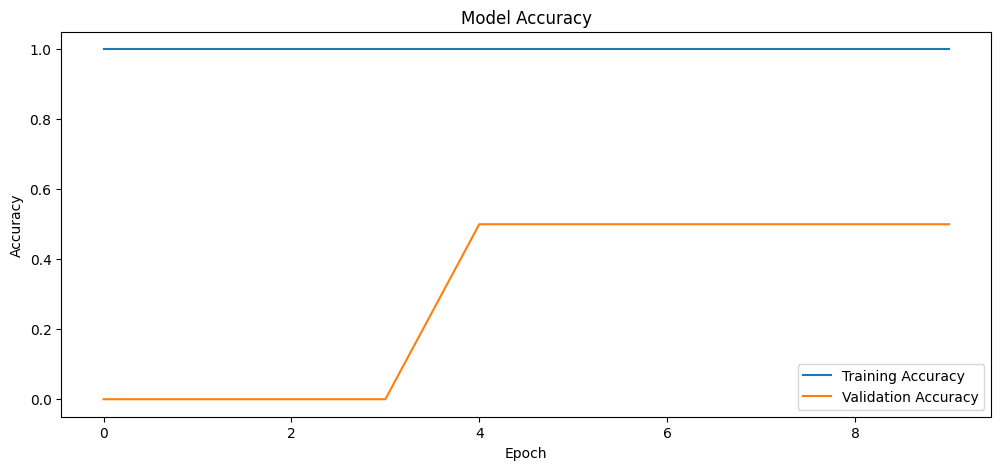

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

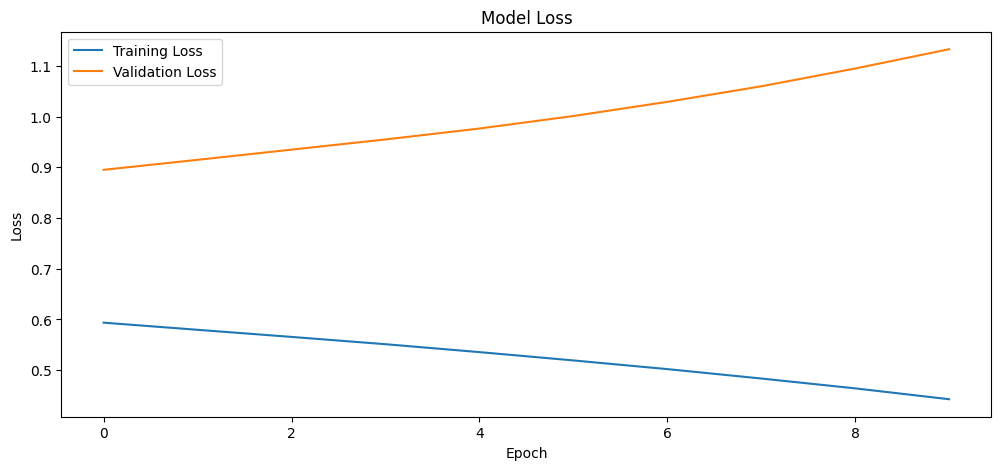

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0000e+00 - loss: 0.9206
Test Accuracy: 0.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


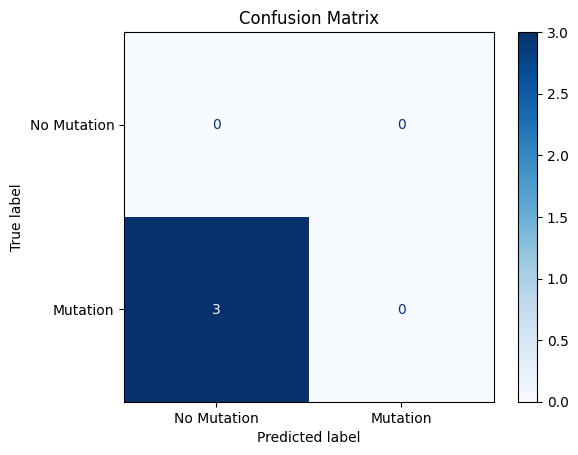

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")
predictions = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Mutation', 'Mutation'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()